In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
import seaborn as sns
from scipy.stats import linregress


c:\Users\Lukas.loup\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
col_pal = sns.color_palette()

In [42]:
def style_plt (titel = '',titel_fontsize=20,fontweight= 'bold' ,figsize = (15,8)):
    plt.figure(figsize=figsize)
    plt.title(titel,fontsize =titel_fontsize, fontweight=fontweight )

# Time Series

In [4]:
input_dir = './Data/Preparation/merged_typologien.xlsx'
df = pd.read_excel(input_dir)

In [5]:
#rows mit ganzem Kanton luzern löschen
indexNames = df[df['Gemeinde'] == 'Kanton Luzern'].index
df.drop(indexNames , axis=0, inplace=True)
df = df.reset_index()
df.drop('index',  axis=1, inplace=True)
#df['Jahr'] = pd.to_datetime(df['Jahr'], format='%Y', errors='ignore')
df.head()

,Gemeinde,Gemeinde ID,Mittlere Wohnbevölkerung,Ständige Wohnbevölkerung Total,Ständige Wohnbevölkerung Ausländer-anteil in %,Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2,Ständige Wohnbevölkerung Anteil 0-19-Jährige in %,Ständige Wohnbevölkerung Anteil 20-64-Jährige in %,Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %,Jahr,Gemeindetypologien
0,Adligenswil,1051.0,4330,4356,6.6,623.2,34.6,61.8,3.6,1991,Agglokern
1,Aesch,1021.0,896,912,6.6,157.2,29.5,61.3,9.2,1991,Land
2,Alberswil,1121.0,432,428,8.2,121.1,26.2,64.0,9.8,1991,Land
3,Altbüron,1122.0,739,749,4.1,111.0,29.1,59.5,11.3,1991,Land
4,Altishofen,1123.0,1541,1515,10.6,105.8,30.4,58.5,11.1,1991,Land


In [8]:
#Kategrien erstellen
# Kodieren der kategorialen Variable mit get_dummies() von Pandas
df = pd.get_dummies(df, columns=['Gemeindetypologien'],prefix='', prefix_sep='')
df = df.drop(['Gemeinde'],axis=1)
df.head()

KeyError: "None of [Index(['Gemeindetypologien'], dtype='object')] are in the [columns]"

In [9]:
df.set_index(['Gemeinde ID','Jahr'], inplace= True)
df = df.sort_index()

In [15]:
df.loc[:1991]

Mittlere Wohnbevölkerung  Ständige Wohnbevölkerung Total  \
Gemeinde ID Jahr                                                             
1001.0      1991                       562                             575   
            1992                       585                             596   
            1993                       611                             603   
            1994                       613                             630   
            1995                       643                             655   
...                                    ...                             ...   
1151.0      2017                      8937                            8976   
            2018                      8964                            8951   
            2019                      8961                            8970   
            2020                      8940                            8910   
            2021                      8963                            9015   

                 Ständige Wohnbevölkerung Ausländer-anteil in %  \
Gemeinde ID Jahr                                                  
1001.0      1991                                            0.3   
            1992                                            0.2   
            1993                                            0.3   
            1994                                            1.9   
            1995                                            3.1   
...                                                         ...   
1151.0      2017                                           13.2   
            2018                                           12.9   
            2019                                           13.1   
            2020                                           13.3   
            2021                                           13.4   

                  Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2  \
Gemeinde ID Jahr                                                               
1001.0      1991                                               82.8            
            1992                                               85.8            
            1993                                               86.8            
            1994                                               90.7            
            1995                                               94.3            
...                                                             ...            
1151.0      2017                                              190.1            
            2018                                              189.6            
            2019                                              190.0            
            2020                                              188.7            
            2021                                              190.9            

                  Ständige Wohnbevölkerung Anteil 0-19-Jährige in %  \
Gemeinde ID Jahr                                                      
1001.0      1991                                               32.9   
            1992                                               32.4   
            1993                                               32.7   
            1994                                               32.2   
            1995                                               32.4   
...                                                             ...   
1151.0      2017                                               22.1   
            2018                                               22.3   
            2019                                               22.4   
            2020                                               22.2   
            2021                                               22.0   

                  Ständige Wohnbevölkerung Anteil 20-64-Jährige in %  \
Gemeinde ID Jahr                                                       
1001.0      1991      

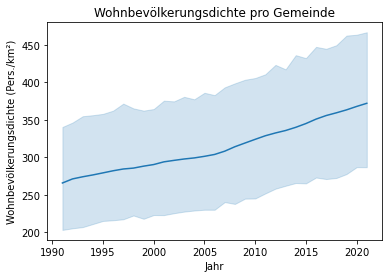

In [39]:
# Group data by Gemeinde and Jahr, and compute the mean of Bevölkerungsdichte
grouped_df = df.groupby(['Gemeinde ID', 'Jahr'])['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2'].mean().reset_index()

# Plot the data using seaborn
sns.lineplot(data=grouped_df, x='Jahr', y='Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2')

# Set plot title and axis labels
plt.title('Wohnbevölkerungsdichte pro Gemeinde')
plt.xlabel('Jahr')
plt.ylabel('Wohnbevölkerungsdichte (Pers./km²)')

# Show the plot
plt.show()

C:\Users\LUKAS~1.LOU\AppData\Local\Temp/ipykernel_11592/2812564755.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


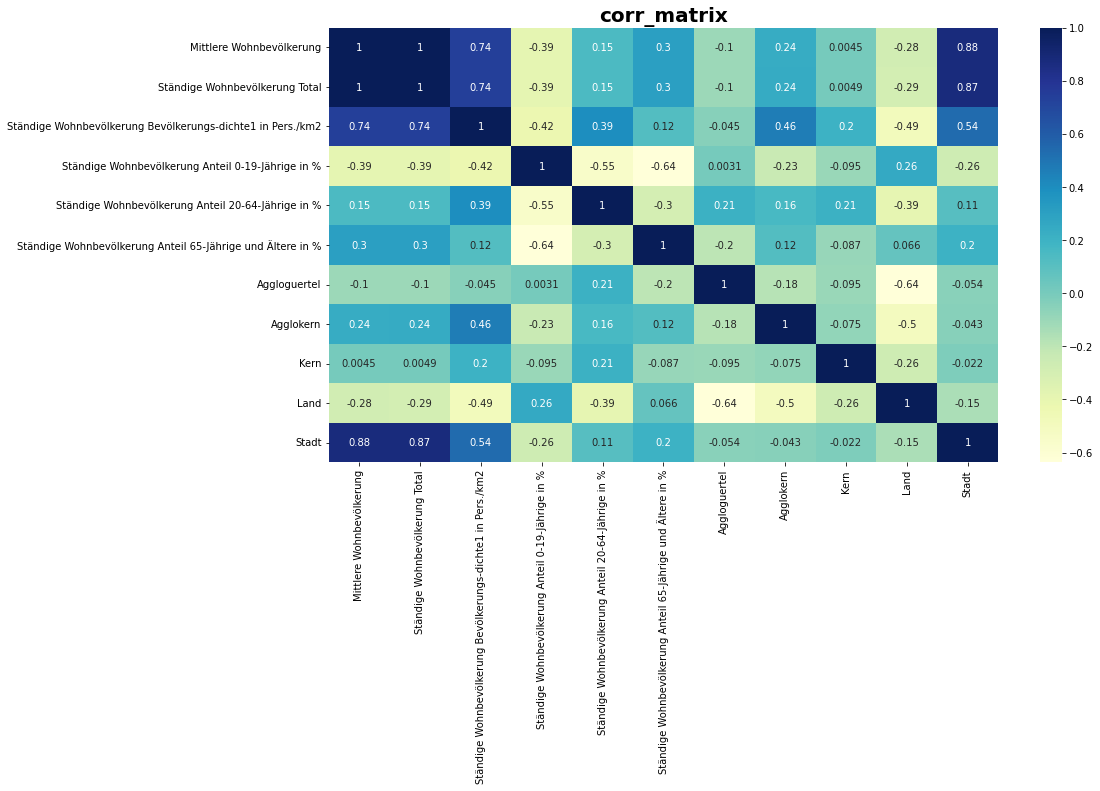

In [54]:
corr_matrix = df.corr()
style_plt(f'corr_matrix')
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

def split_time_series_data(data, test_size=0.2, n_splits=2):
    """
    Splits a time series data into training and test sets using TimeSeriesSplit method from scikit-learn
    
    Parameters:
        - data (pandas dataframe or numpy array): the time series data to be split
        - test_size (float): the proportion of the data to be used as test data, default is 0.2
        - n_splits (int): the number of splits/folds to create, default is 5
        
    Returns:
        - train_data (pandas dataframe or numpy array): the training data
        - test_data (pandas dataframe or numpy array): the test data
    
    """
    tscv = TimeSeriesSplit(n_splits=n_splits)
    data.reset_index(inplace=True)
    
    # Get the index for the train-test split
    test_index = int(len(data)*(1-test_size))
    print (test_index)
    
    for train_index, test_index in tscv.split(data):
        train_data = data.loc[train_index]
        test_data = data.loc[test_index]
        
    return train_data, test_data

In [62]:
def trendanalyse(df, window_size):
    # DataFrame kopieren und NaN-Werte entfernen
    df = df.copy().dropna()

    # Rolling window berechnen
    rolling = df.rolling(window=window_size)

    # Berechnen der Rolling-Statistiken
    rolling_mean = rolling.mean()
    rolling_std = rolling.std()

    # Berechnen der linearen Regression
    #x = pd.to_numeric(df.index).astype(float)
    slope, intercept, r_value, p_value, std_err = linregress(df.index, df.values)


    # Tend berchnen 
    trend = intercept + slope * df.index
    # Residuen  berchnen
    # Berechne die Residuen des Modells
    # um so näher an null deso messer is das model 
    residuals = df.values - trend

    # Erstellen eines DataFrame mit Ergebnissen
    results = pd.DataFrame({
        'Mean': rolling_mean.squeeze(),
        'Std': rolling_std.squeeze(),
        'Slope': slope,
        'Intercept': intercept,
        'R-Value': r_value,
        'P-Value': p_value,
        'Std Err': std_err,
        'Trend' : trend,
        'Residuals': residuals
    })
    
    return results

In [74]:
def plot_trendanalyse(df,column,window_size= 30,figsize= (15, 15) ):
    # Trendanalyse durchführen
    results = trendanalyse(df[column], window_size=window_size)
    # Plotten der Zeitreihe und des Trends
    fig, ax = plt.subplots(figsize=figsize,nrows=2, sharex=True)
    ax[0].plot(df.index, df[column], label='Original Data')
    ax[0].plot(results.index, results['Mean'], label='Rolling Mean')
    ax[0].plot(results.index, results['Trend'], label='Trend')
    ax[0].fill_between(results.index, results['Mean']-results['Std'], results['Mean']+results['Std'], alpha=0.2, label='Rolling Std')
    ax[0].legend()
    ax[0].set_title('Trend Analysis')
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Value')
    
    # nois ploting
    results['Residuals'].plot(ax=ax[1],color = 'red')
    ax[1].set_ylabel('Residuen')
    ax[1].set_title('Residuen')
    plt.show()
    return results

1001.0


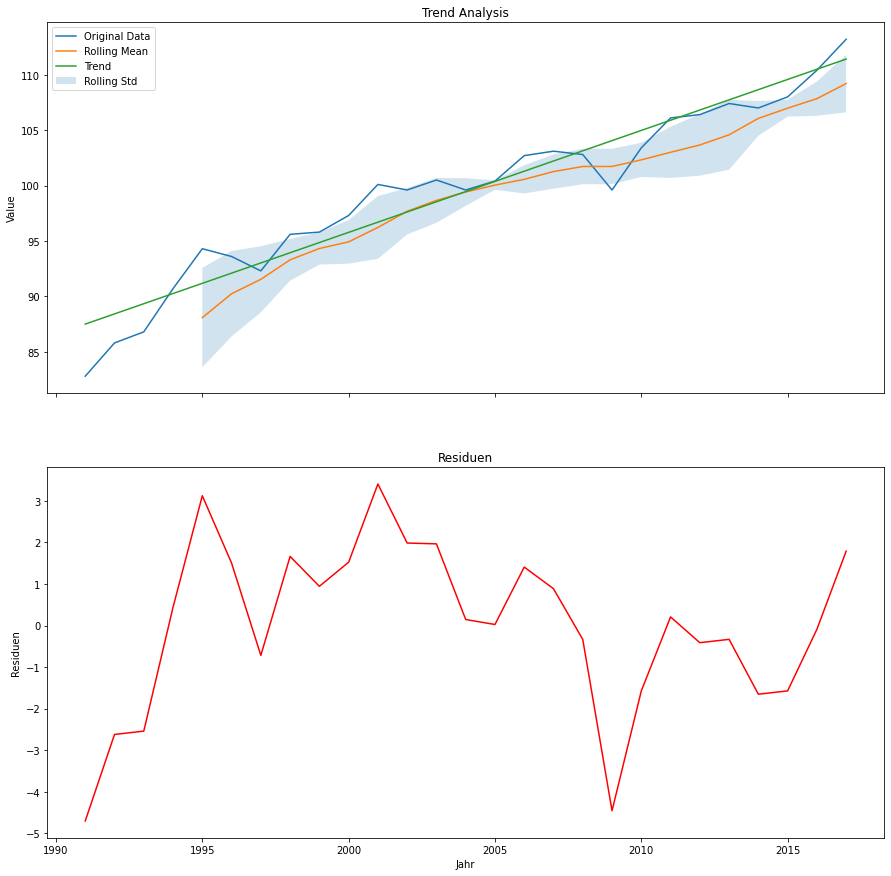

1002.0


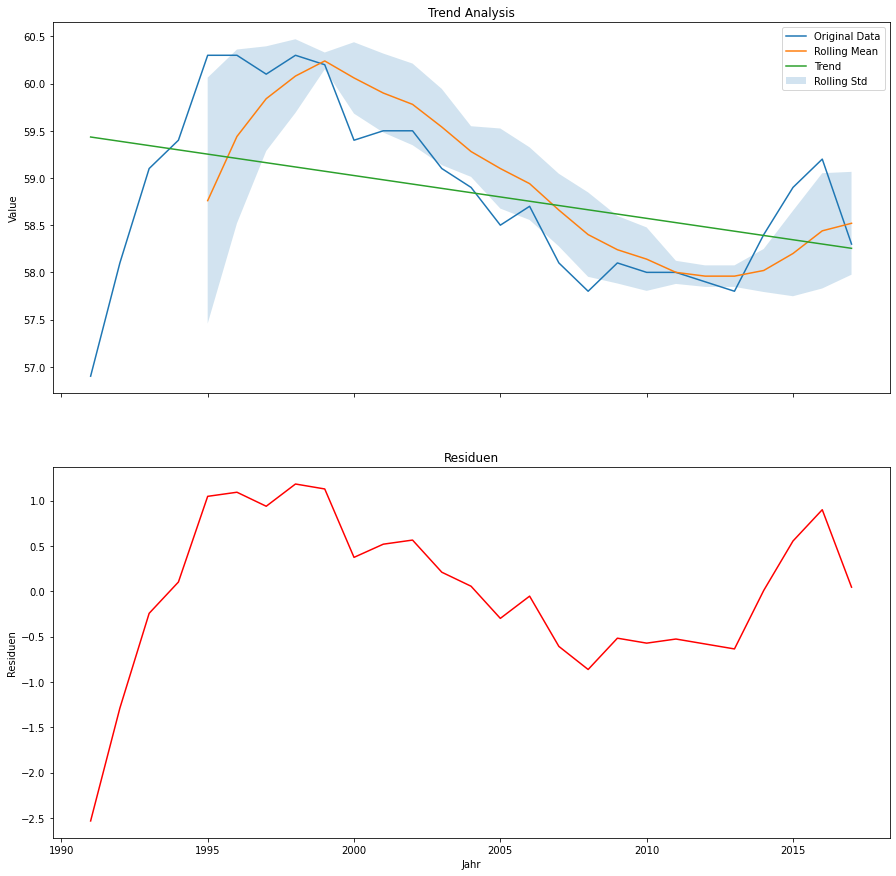

1004.0


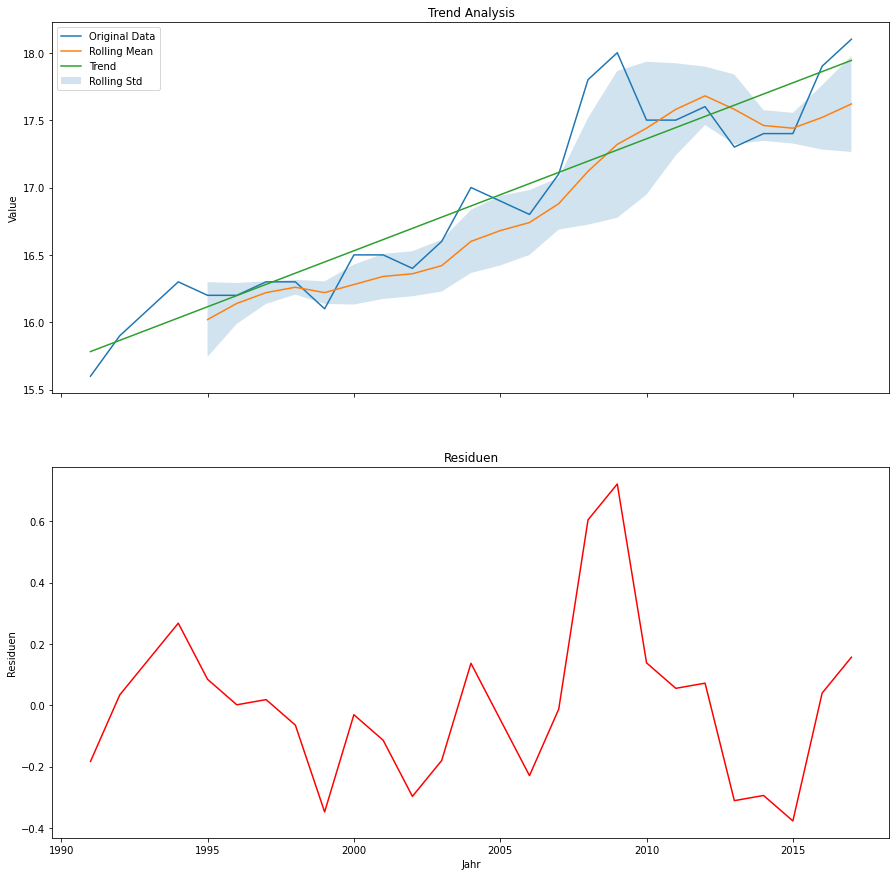

1005.0


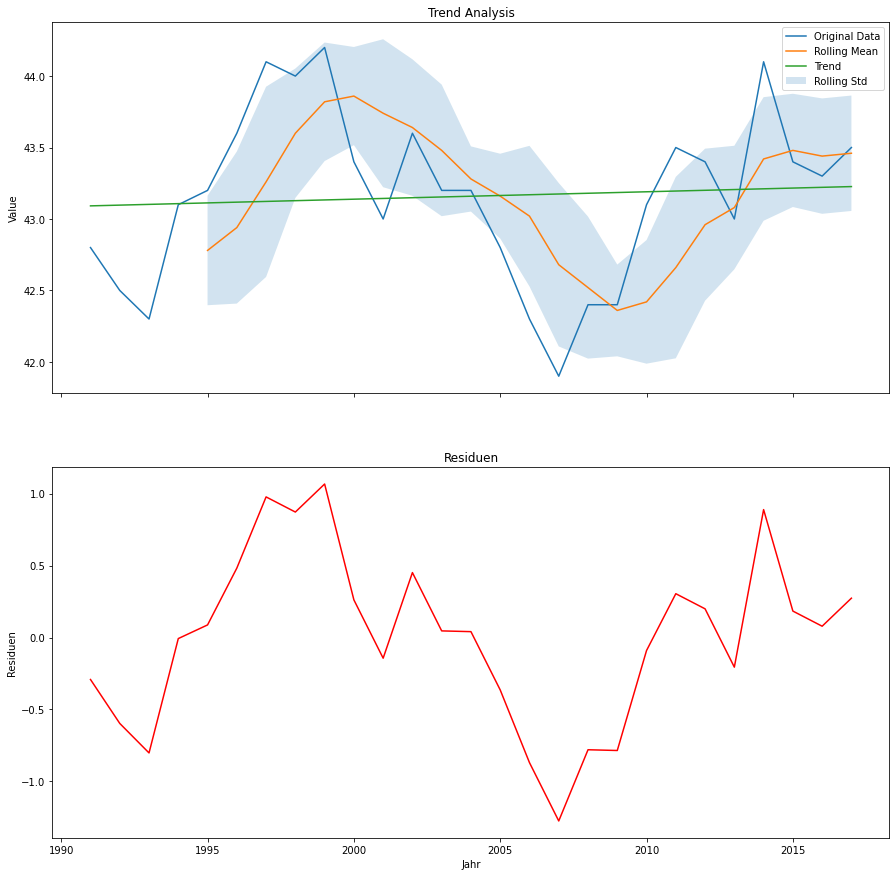

1007.0


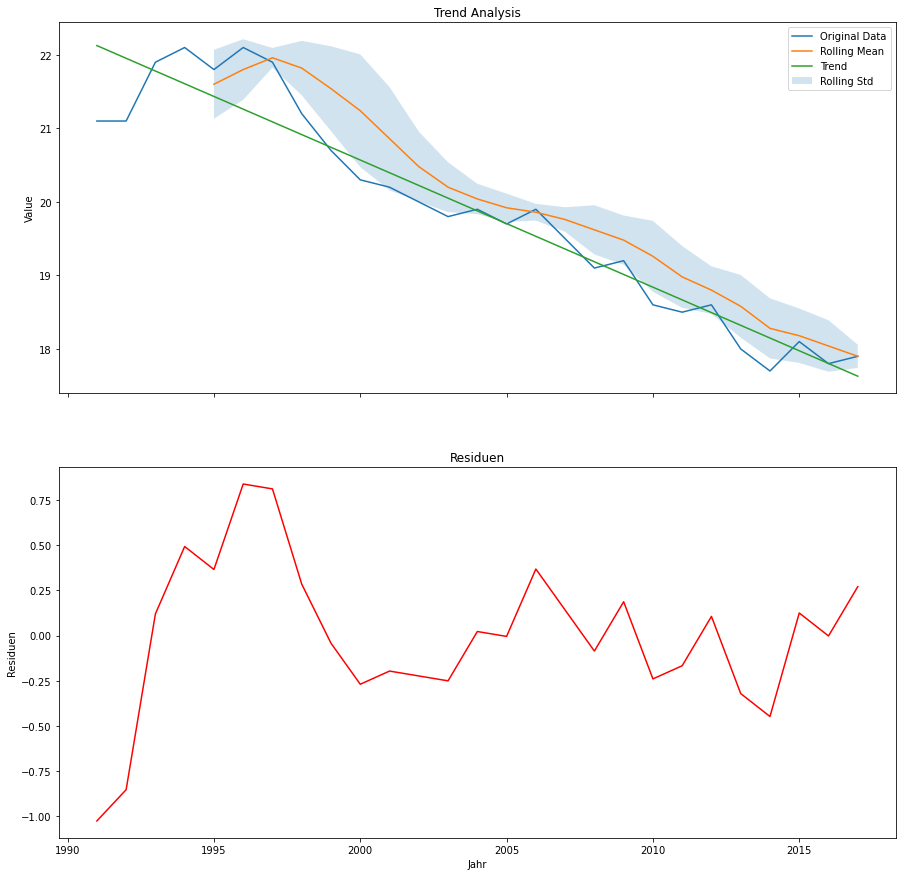

1008.0


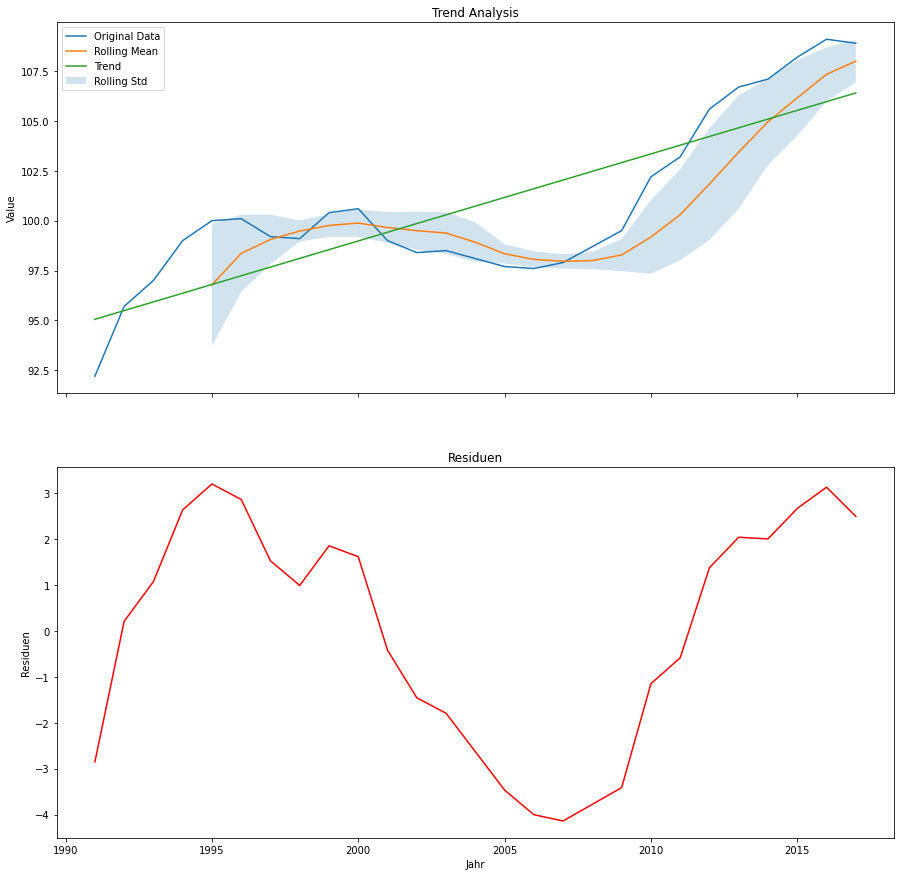

In [113]:

for ids in df_train.index.get_level_values(0).unique():
    print(ids)
    plot_trendanalyse(df_train.loc[ids],'Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2',5)
    if ids == 1008.0:
        break

In [102]:
df.head()
columns_drop = ['Mittlere Wohnbevölkerung',
                    'Ständige Wohnbevölkerung Total',
                    'Ständige Wohnbevölkerung Anteil 0-19-Jährige in %',
                    'Ständige Wohnbevölkerung Anteil 20-64-Jährige in %',
                    'Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %',
                    'Ständige Wohnbevölkerung Ausländer-anteil in %']

df_drop = df.drop(columns_drop, axis=1)
df_drop.head()

Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2  \
Gemeinde ID Jahr                                                               
1001.0      1991                                               82.8            
            1992                                               85.8            
            1993                                               86.8            
            1994                                               90.7            
            1995                                               94.3            

                  Aggloguertel  Agglokern  Kern  Land  Stadt  
Gemeinde ID Jahr                                              
1001.0      1991             0          0     0     1      0  
            1992             0          0     0     1      0  
            1993             0          0     0     1      0  
            1994             0          0     0     1      0  
            1995             0          0     0     1      0

In [121]:
df.head()

Mittlere Wohnbevölkerung  Ständige Wohnbevölkerung Total  \
Gemeinde ID Jahr                                                             
1001.0      1991                       562                             575   
            1992                       585                             596   
            1993                       611                             603   
            1994                       613                             630   
            1995                       643                             655   

                 Ständige Wohnbevölkerung Ausländer-anteil in %  \
Gemeinde ID Jahr                                                  
1001.0      1991                                            0.3   
            1992                                            0.2   
            1993                                            0.3   
            1994                                            1.9   
            1995                                            3.1   

                  Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2  \
Gemeinde ID Jahr                                                               
1001.0      1991                                               82.8            
            1992                                               85.8            
            1993                                               86.8            
            1994                                               90.7            
            1995                                               94.3            

                  Ständige Wohnbevölkerung Anteil 0-19-Jährige in %  \
Gemeinde ID Jahr                                                      
1001.0      1991                                               32.9   
            1992                                               32.4   
            1993                                               32.7   
            1994                                               32.2   
            1995                                               32.4   

                  Ständige Wohnbevölkerung Anteil 20-64-Jährige in %  \
Gemeinde ID Jahr                                                       
1001.0      1991                                               56.2    
            1992                                               56.4    
            1993                                               56.9    
            1994                                               57.6    
            1995                                               57.1    

                  Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %  \
Gemeinde ID Jahr                                                               
1001.0      1991                                               11.0            
            1992                                               11.2            
            1993                                               10.4            
            1994                                               10.2            
            1995                                               10.5            

                  Aggloguertel  Agglokern  Kern  Land  Stadt  
Gemeinde ID Jahr                                              
1001.0      1991             0          0     0     1      0  
            1992             0          0     0     1      0  
            1993             0          0     0     1      0  
            1994             0          0     0     1      0  
            1995             0          0     0     1      0

## Rolling Man

In [108]:
def trend_analysis_with_prediction(df, window_size,test_Jahr):
    # DataFrame kopieren und NaN-Werte entfernen
    df = df.copy().dropna()
    
    # Rolling window berechnen
    rolling = df.rolling(window=window_size)

    # Berechnen der Rolling-Statistiken
    rolling_mean = rolling.mean()
    rolling_std = rolling.std()

    # Berechnen der linearen Regression
    #x = pd.to_numeric(df.index).astype(float)
    slope, intercept, r_value, p_value, std_err = linregress(df.index, df.values)


    # Tend berchnen 
    trend = intercept + slope * df.index
    # Residuen  berchnen
    # Berechne die Residuen des Modells
    # um so näher an null deso messer is das model 
    residuals = df.values - trend

    # Erstellen eines DataFrame mit Ergebnissen
    results = pd.DataFrame({
        'Mean': rolling_mean.squeeze(),
        'Std': rolling_std.squeeze(),
        'Slope': slope,
        'Intercept': intercept,
        'R-Value': r_value,
        'P-Value': p_value,
        'Std Err': std_err,
        'Trend' : trend,
        'Residuals': residuals
    })
    

In [111]:
rolling_mean_prediction(df,'Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2',3,3)

Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2
Prediction 1                                                NaN         
           2                                                NaN         
           3                                          85.133333

In [90]:
rolling_mean_prediction(df_train, df_test, 5)


C:\Users\LUKAS~1.LOU\AppData\Local\Temp/ipykernel_11592/305479954.py:7: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Ständige Wohnbevölkerung Ausländer-anteil in %'], dtype='object')
  rolling_mean = train_data.rolling(window=window).mean().iloc[window - 1:]


KeyError: -1

In [149]:
#spalten, die wir nicht brauchen
columns_drop = ['Mittlere Wohnbevölkerung',
                    'Gemeinde ID',
                    'Ständige Wohnbevölkerung Total',
                    'Ständige Wohnbevölkerung Anteil 0-19-Jährige in %',
                    'Ständige Wohnbevölkerung Anteil 20-64-Jährige in %',
                    'Ständige Wohnbevölkerung Anteil 65-Jährige und Ältere in %',
                    'Ständige Wohnbevölkerung Ausländer-anteil in %']

df = df.drop(columns_drop, axis=1)
df.head()

,Gemeinde,Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2,Jahr,Gemeindetypologien
0,Kanton Luzern,218.5,1991,NaN
1,Adligenswil,623.2,1991,Agglokern
2,Aesch,157.2,1991,Land
3,Alberswil,121.1,1991,Land
4,Altbüron,111.0,1991,Land


Agglokern
310
310


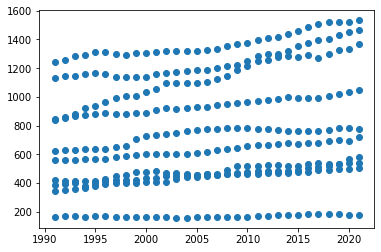

Land
1581
1581


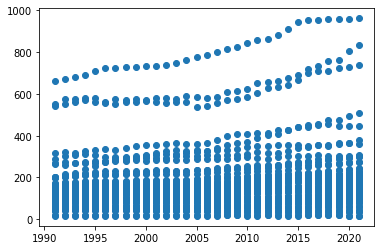

Aggloguertel
465
465


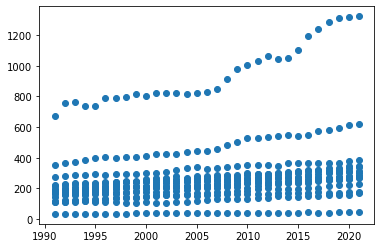

Stadt
31
31


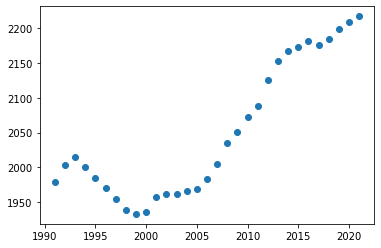

Kern
93
93


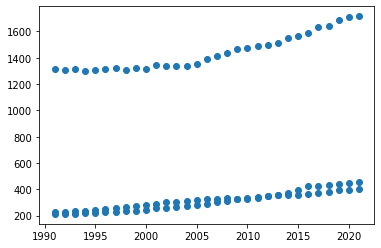

In [211]:
for gt in df.Gemeindetypologien.unique():
    print(gt)
    dt_t = df[df['Gemeindetypologien']== gt]
    print (len(dt_t.index.get_level_values(1)))
    print (len(dt_t['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2']) )
    plt.scatter(dt_t.index.get_level_values(1),dt_t['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2'])
    #for ge in dt_t.index.get_level_values(0).unique():
    #plt.title(gt)
    #print(dt_t.index.get_level_values(1).unique().to_list())
        #print(ge)
    #plt.plot(dt_t.index.get_level_values(1).unique().to_list(),df['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2'])
    plt.show()
    #print (df[df['Gemeindetypologien']== gt])#.get_level_values(0).unique())

### ACF 
Autocorreltion function

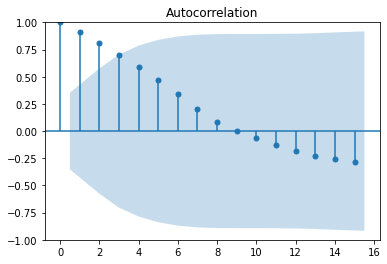

In [171]:
tsaplots.plot_acf(df.loc['Adligenswil']['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2'])
plt.show()

### PACF
partial Autocorreation functions

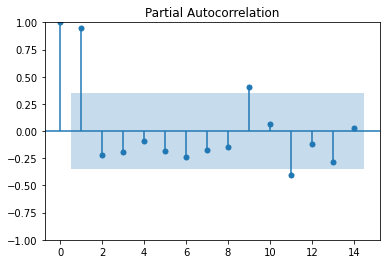

In [179]:
tsaplots.plot_pacf(df.loc['Adligenswil']['Ständige Wohnbevölkerung Bevölkerungs-dichte1 in Pers./km2'],lags=14)
plt.show()

In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

def multivariate_time_series_analysis(data, train_size, test_size, lags):
    # Split data into train and test sets
    train_data = df.iloc[:int(len(df)*train_size)]
    test_data = df.iloc[:int(len(df)*test_size)]

    # Create VAR model
    model = VAR(train_data)

    # Determine optimal number of lags
    model_fit = model.fit(maxlags=lags, ic='aic')

    # Forecast on test set
    predictions = model_fit.forecast(model_fit.y, steps=test_size)

    # Convert predictions to pandas dataframe
    pred_df = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)

    # Evaluate model performance
    rmse = np.sqrt(mean_squared_error(test_data, pred_df))
    print(f'RMSE: {rmse}')

    # Plot actual vs predicted values
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(test_data.index, test_data['feature1'], label='Actual')
    ax.plot(pred_df.index, pred_df['feature1'], label='Predicted')
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Feature 1')
    ax.set_title('Multivariate Time Series Analysis')

    return model_fit, pred_df

In [507]:
multivariate_time_series_analysis(df, 0.8, 0.2, 1)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).